## Librerias

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tkinter import filedialog
from tkinter import Tk
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam


# Importacion de librerias para la parte 2
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

## Cargar datos

In [2]:
emotion_labels = ['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']
image_size = (48, 48) 

data_dir = "E:\IA ESTUPIDA\deep learning\ELAS-Proyect\data\deep"
X = []
y = []

# 3. CARGAR IMÁGENES
for label in emotion_labels:
    emotion_path = os.path.join(data_dir, label)
    for file in os.listdir(emotion_path):
        if file.endswith('.jpg') or file.endswith('.png'):
            img_path = os.path.join(emotion_path, file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, image_size)
            X.append(img)
            y.append(label)

X = np.array(X) / 255.0
X = X.reshape(-1, 48, 48, 1)
y = np.array(y)

# Codificamos las etiquetas
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_cat = to_categorical(y_encoded)

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

print("Datos cargados y preprocesados correctamente.")


<>:4: SyntaxWarning: invalid escape sequence '\I'
<>:4: SyntaxWarning: invalid escape sequence '\I'
C:\Users\jeanp\AppData\Local\Temp\ipykernel_27684\1445094245.py:4: SyntaxWarning: invalid escape sequence '\I'
  data_dir = "E:\IA ESTUPIDA\deep learning\ELAS-Proyect\data\deep"


Datos cargados y preprocesados correctamente.


## Preparar carga neuronal

In [12]:
# PREGUNTAMOS CON UN TRY
try:
    opcion = int(input("Elige la opción (1: 4 neuronas, 2: 50 neuronas, 3: 120 neuronas): "))
    if opcion == 1:
        neurons = 4
    elif opcion == 2:
        neurons = 50
    elif opcion == 3:
        neurons = 120
    else:
        print("Opción inválida. Se usará 50 por defecto.")
        neurons = 50
except:
    print("Entrada inválida. Se usará 50 por defecto.")
    neurons = 50

print(f"Usando {neurons} neuronas en la capa oculta.")

# DEFINIR MODELO
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(neurons, activation='relu'),
    Dropout(0.5),
    Dense(len(emotion_labels), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Usando 4 neuronas en la capa oculta.


C:\Users\jeanp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │        25,604 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │            35 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,455 (173.65 KB)

 Trainable params: 44,455 (173.65 KB)

 Non-trainable params: 0 (0.00 B)

## Entrenamiento de el modelo y guardado

In [ ]:
E# NTRENAMIENTO
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

# GUARDAR MODELO
model.save("modelo_emociones120.h5")
print("Modelo guardado como modelo_4NEURONAS.h5")

Epoch 1/15


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "conv2d_2" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (None, 224, 224, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 224, 224, 3), dtype=float32)
  • training=True
  • mask=None

## Precargar nuronas elegidas

In [5]:
# CARGAR MODELO
modelo = load_model("modelo_emociones.h5")
# ABRIR DIALOGO PARA SUBIR IMAGEN
Tk().withdraw()
ruta_imagen = filedialog.askopenfilename()
# PREPROCESAR IMAGEN
img = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (48,48))
img = img / 255.0
img = img.reshape(1, 48, 48, 1)
# PREDICCIÓN
pred = modelo.predict(img)
indice = np.argmax(pred)
print(f"Emoción detectada: {le.inverse_transform([indice])[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
Emoción detectada: sadness


## Mostrar Resultados

In [6]:
# CARGAR MODELO
modelo = load_model("modelo_emociones120.h5")
# ABRIR DIALOGO PARA SUBIR IMAGEN
Tk().withdraw()
ruta_imagen = filedialog.askopenfilename()
# PREPROCESAR IMAGEN
img = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (48,48))
img = img / 255.0
img = img.reshape(1, 48, 48, 1)
# PREDICCIÓN
pred = modelo.predict(img)[0]
# MOSTRAR RESULTADO EN PORCENTAJE
print("Probabilidades por emoción:")
for i, prob in enumerate(pred):
    emocion = le.inverse_transform([i])[0]
    porcentaje = round(prob * 100, 2)
    print(f"- {emocion}: {porcentaje}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Probabilidades por emoción:
- anger: 0.0%
- contempt: 0.009999999776482582%
- disgust: 0.03999999910593033%
- fear: 0.0%
- happy: 0.0%
- sadness: 99.83999633789062%
- surprise: 0.10000000149011612%


## Cambio de modelo por deteccion erronea por puro aprendizaje

C:\Users\jeanp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 978ms/step - accuracy: 0.3217 - loss: 1.9135 - val_accuracy: 0.5533 - val_loss: 1.3726
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 824ms/step - accuracy: 0.5807 - loss: 1.3449 - val_accuracy: 0.6650 - val_loss: 1.0901
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 802ms/step - accuracy: 0.6248 - loss: 1.1023 - val_accuracy: 0.7208 - val_loss: 0.9504
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 806ms/step - accuracy: 0.6951 - loss: 0.9840 - val_accuracy: 0.7462 - val_loss: 0.8410
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 760ms/step - accuracy: 0.7345 - loss: 0.8431 - val_accuracy: 0.8020 - val_loss: 0.7581
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 786ms/step - accuracy: 0.7559 - loss: 0.8006 - val_accuracy: 0.7919 - val_loss: 0.6934
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 837ms/step - accuracy: 0.7934 - loss: 0.6883 - val_accuracy: 0.7970 - val_loss: 0.6498
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 824ms/step - accuracy: 0.7998 - loss: 0.6411 - val_accu

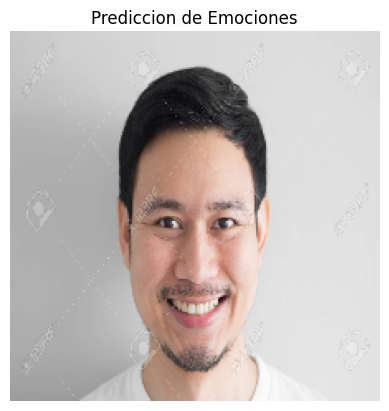

In [7]:
# EMOTION DETECTION MODEL WITH MOBILENETV2
data_dir = 'E:/IA ESTUPIDA/deep learning/ELAS-Proyect/data/deep'
"  # Ruta base de carpetas"
emociones = ["anger", "contempt", "disgust", "fear", "happy", "sadness", "surprise"]
img_size = 224
neurona_opcion = 3  # Cambia esto a 1, 2 o 3 (1 = 4, 2 = 50, 3 = 120)

neuronas_dict = {1: 4, 2: 50, 3: 512}
neuronas = neuronas_dict.get(neurona_opcion, 50)

X = []
y = []

for idx, emocion in enumerate(emociones):
    emocion_folder = os.path.join(data_dir, emocion)
    for img_name in os.listdir(emocion_folder):
        img_path = os.path.join(emocion_folder, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (img_size, img_size))
            img = img.astype('float32') / 255.0
            X.append(img)
            y.append(idx)

X = np.array(X)
y = to_categorical(y, num_classes=len(emociones))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

datagen = ImageDataGenerator(rotation_range=15, zoom_range=0.1, horizontal_flip=True)
datagen.fit(X_train)

base_model = MobileNetV2(input_shape=(img_size, img_size, 3), include_top=False, weights='imagenet')
base_model.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(neuronas, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(len(emociones), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_test, y_test))

Tk().withdraw()
ruta_imagen = filedialog.askopenfilename()
img = cv2.imread(ruta_imagen)
img_resized = cv2.resize(img, (img_size, img_size))
img_array = img_resized.astype('float32') / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediccion = model.predict(img_array)[0]

for i, prob in enumerate(prediccion):
    print(f"{emociones[i]}: {prob*100:.2f}%")

plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
plt.title("Prediccion de Emociones")
plt.axis('off')
plt.show()


# Mejoramiento de modelo por MvilNet


In [8]:
data_dir = 'E:/IA ESTUPIDA/deep learning/ELAS-Proyect/data/deep'
IMG_SIZE = (96, 96)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    rotation_range=15
)
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 788 images belonging to 7 classes.
Found 193 images belonging to 7 classes.


## Cargar y preparar datos

In [9]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(7, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Entrenar modelo

In [10]:
history = model.fit(train_generator, validation_data=val_generator, epochs=15)

Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 283ms/step - accuracy: 0.3372 - loss: 1.9639 - val_accuracy: 0.5803 - val_loss: 1.1841
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 189ms/step - accuracy: 0.6088 - loss: 1.1262 - val_accuracy: 0.6166 - val_loss: 1.0033
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 205ms/step - accuracy: 0.7031 - loss: 0.8370 - val_accuracy: 0.6632 - val_loss: 0.9227
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 189ms/step - accuracy: 0.7602 - loss: 0.7175 - val_accuracy: 0.7150 - val_loss: 0.8566
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 191ms/step - accuracy: 0.7532 - loss: 0.6651 - val_accuracy: 0.7668 - val_loss: 0.7670
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 444ms/step - accuracy: 0.7880 - loss: 0.5988 - val_accuracy: 0.7047 - val_loss: 0.8455
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 221ms/step - accuracy: 0.8027 - loss: 0.5594 - val_accuracy: 0.7824 - val_loss: 0.6599
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 190ms/step - accuracy: 0.8148 - loss: 0.5103 - val_accuracy: 

## Subir imagen y predecir emociones con porcentajes

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
anger: 1.15%
contempt: 0.24%
disgust: 31.09%
fear: 0.55%
happy: 64.41%
sadness: 0.45%
surprise: 2.10%


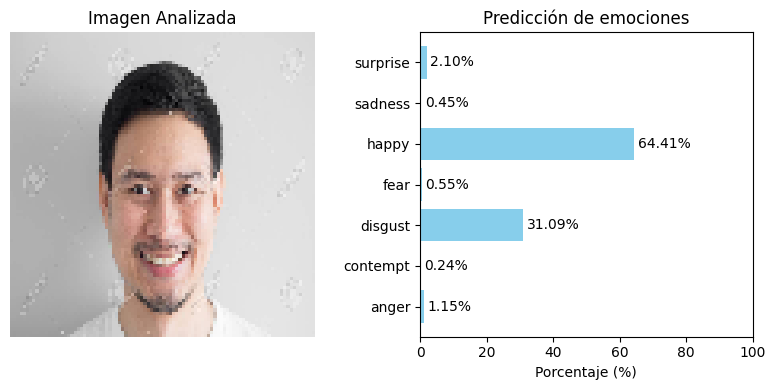

In [11]:
# Elegir imagen
Tk().withdraw()
file_path = filedialog.askopenfilename()

# Leer y procesar imagen
img = image.load_img(file_path, target_size=IMG_SIZE)
img_array = image.img_to_array(img)
img_array = preprocess_input(img_array)
img_array = np.expand_dims(img_array, axis=0)

# Predecir
predicciones = model.predict(img_array)[0]

emociones = train_generator.class_indices
emociones = dict((v,k) for k,v in emociones.items())

for i, prob in enumerate(predicciones):
    print(f"{emociones[i]}: {prob*100:.2f}%")

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')
plt.title("Imagen Analizada")

plt.subplot(1, 2, 2)
plt.barh(list(emociones.values()), predicciones * 100, color='skyblue')
plt.xlabel('Porcentaje (%)')
plt.title("Predicción de emociones")
plt.xlim(0, 100)
for i, v in enumerate(predicciones * 100):
    plt.text(v + 1, i, f"{v:.2f}%", va='center')

plt.tight_layout()
plt.show()

#DATOS CAMBIADOS

Los datos se modificaron por tal se hara un cambio completo y restructuracion de el codigo


In [ ]:
#PRIMERA PARTE DE EL MODELO


import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tkinter import filedialog, Tk

# USANDO MOBILNETV2

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image


from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
import shutil


In [4]:
# Cargar dataset desde archivo NPZ ya fusionado

data = np.load('datos_emociones_fusionados.npz')
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']
clases = data['clases']

print(f"Datos cargados correctamente. Clases: {list(clases)}")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")


Datos cargados correctamente. Clases: [np.str_('angry'), np.str_('fear'), np.str_('happy'), np.str_('sad'), np.str_('surprise')]
X_train shape: (5159, 48, 48, 1), y_train shape: (5159, 5)


In [13]:
# ✅ Selección de cantidad de neuronas ocultas
try:
    opcion = int(input("Elige la opción (1: 4 neuronas, 2: 50 neuronas, 3: 120 neuronas): "))
    if opcion == 1:
        neurons = 4
    elif opcion == 2:
        neurons = 50
    elif opcion == 3:
        neurons = 120
    else:
        print("Opción inválida. Se usará 50 por defecto.")
        neurons = 50
except:
    print("Entrada inválida. Se usará 50 por defecto.")
    neurons = 50

print(f"✅ Usando {neurons} neuronas en la capa oculta.")

# ✅ Definición del modelo CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(neurons, activation='relu'),
    Dropout(0.5),
    Dense(len(clases), activation='softmax')  # ✅ ahora correcto
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


✅ Usando 120 neuronas en la capa oculta.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 120)            │       768,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           605 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 787,541 (3.00 MB)

 Trainable params: 787,541 (3.00 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# ENTRENAMIENTO
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

# GUARDAR MODELO CON NOMBRE SEGÚN LA OPCIÓN
nombre_modelo = f"modelo {neurons} neuronas.h5"
model.save(nombre_modelo)
print(f"✅ Modelo guardado como {nombre_modelo}")


Epoch 1/15
162/162 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - accuracy: 0.3152 - loss: 1.5750 - val_accuracy: 0.4295 - val_loss: 1.3814
Epoch 2/15
162/162 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.4293 - loss: 1.3789 - val_accuracy: 0.4705 - val_loss: 1.2853
Epoch 3/15
162/162 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.4835 - loss: 1.2689 - val_accuracy: 0.4791 - val_loss: 1.2463
Epoch 4/15
162/162 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.4937 - loss: 1.2383 - val_accuracy: 0.4837 - val_loss: 1.2325
Epoch 5/15
162/162 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.5306 - loss: 1.1584 - val_accuracy: 0.5039 - val_loss: 1.1893
Epoch 6/15
162/162 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.5500 - loss: 1.1271 - val_accuracy: 0.5109 - val_loss: 1.1729
Epoch 7/15
162/162 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.5649 - loss: 1.0631 - val_accuracy: 0.5426 - val_loss: 1.1477
Epoch 8/15
162/162 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.5728 - loss: 1.0167 - val_acc

✅ Modelo guardado como modelo 120 neuronas.h5


In [5]:

# ✅ Cargar el modelo correcto (ajústalo al nombre que hayas guardado)
modelo = load_model("modelo 120 neuronas.h5")  # cambia si usaste otro

# ✅ Cargar clases desde el archivo .npz
data = np.load('datos_emociones_fusionados.npz')
clases = data['clases']

# ✅ Abrir diálogo para seleccionar imagen
Tk().withdraw()
ruta_imagen = filedialog.askopenfilename()

# ✅ Preprocesar imagen
img = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (48, 48))
img = img / 255.0
img = img.reshape(1, 48, 48, 1)

# ✅ Predecir
pred = modelo.predict(img)
indice = np.argmax(pred)

# ✅ Mostrar resultado
print(f"Emoción detectada: {clases[indice]}")


error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [17]:
from tensorflow.keras.models import load_model
from tkinter import filedialog, Tk
import numpy as np
import cv2

# ✅ Cargar modelo (ajusta el nombre si es necesario)
modelo = load_model("modelo 120 neuronas.h5")

# ✅ Cargar clases desde el archivo .npz
data = np.load('datos_emociones_fusionados.npz')
clases = data['clases']

# ✅ Abrir diálogo para seleccionar imagen
Tk().withdraw()
ruta_imagen = filedialog.askopenfilename()

if not ruta_imagen:
    print("⚠️ No se seleccionó ninguna imagen.")
else:
    img = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("❌ No se pudo cargar la imagen. Verifica el archivo.")
    else:
        img = cv2.resize(img, (48, 48))
        img = img / 255.0
        img = img.reshape(1, 48, 48, 1)
        pred = modelo.predict(img)[0]

        print("✅ Probabilidades por emoción:")
        for i, prob in enumerate(pred):
            emocion = clases[i]
            porcentaje = round(prob * 100, 2)
            print(f"- {emocion}: {porcentaje}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
✅ Probabilidades por emoción:
- angry: 19.760000228881836%
- fear: 36.45000076293945%
- happy: 1.4900000095367432%
- sad: 41.31999969482422%
- surprise: 0.9800000190734863%


In [20]:
data = np.load('datos_emociones_fusionados.npz')
print("✅ Claves disponibles en el archivo .npz:")
print(data.files)


✅ Claves disponibles en el archivo .npz:
['X_train', 'X_test', 'y_train', 'y_test', 'clases']


Train: (5159, 48, 48, 1), Test: (1290, 48, 48, 1)
Clases: ['angry' 'fear' 'happy' 'sad' 'surprise']
Epoch 1/15
162/162 ━━━━━━━━━━━━━━━━━━━━ 44s 232ms/step - accuracy: 0.2726 - loss: 2.0300 - val_accuracy: 0.4233 - val_loss: 1.4048
Epoch 2/15
162/162 ━━━━━━━━━━━━━━━━━━━━ 35s 217ms/step - accuracy: 0.3819 - loss: 1.5337 - val_accuracy: 0.4434 - val_loss: 1.3530
Epoch 3/15
162/162 ━━━━━━━━━━━━━━━━━━━━ 37s 227ms/step - accuracy: 0.4074 - loss: 1.4263 - val_accuracy: 0.4481 - val_loss: 1.3247
Epoch 4/15
162/162 ━━━━━━━━━━━━━━━━━━━━ 35s 216ms/step - accuracy: 0.4240 - loss: 1.3783 - val_accuracy: 0.4674 - val_loss: 1.3049
Epoch 5/15
162/162 ━━━━━━━━━━━━━━━━━━━━ 35s 216ms/step - accuracy: 0.4524 - loss: 1.3555 - val_accuracy: 0.4767 - val_loss: 1.2838
Epoch 6/15
162/162 ━━━━━━━━━━━━━━━━━━━━ 33s 207ms/step - accuracy: 0.4594 - loss: 1.3259 - val_accuracy: 0.4744 - val_loss: 1.2671
Epoch 7/15
162/162 ━━━━━━━━━━━━━━━━━━━━ 35s 213ms/step - accuracy: 0.4682 - loss: 1.2939 - val_accuracy: 0.4891 - 

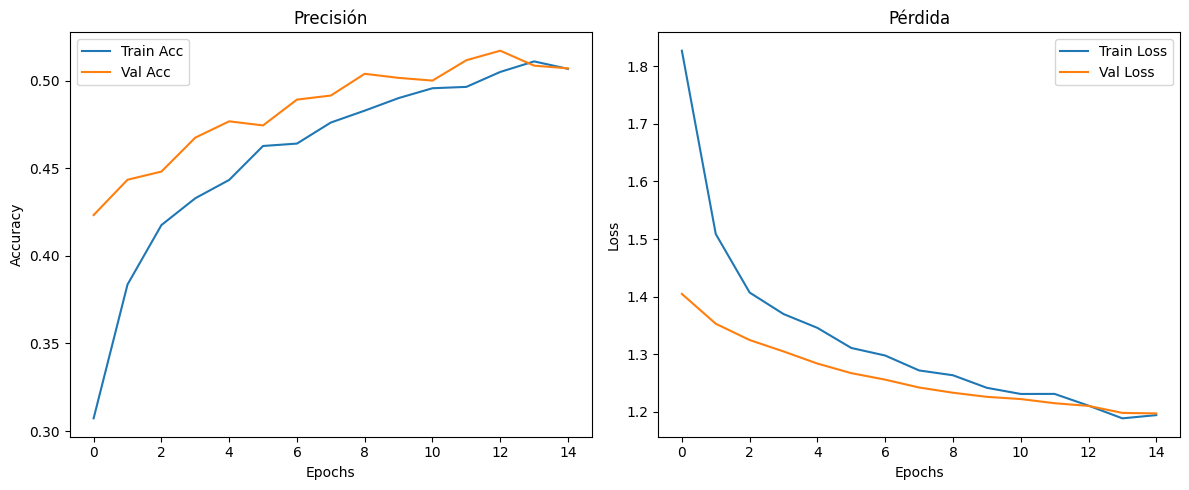

In [ ]:
data = np.load('datos_emociones_fusionados.npz')
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']
clases = data['clases']

print(f"Train: {X_train.shape}, Test: {X_test.shape}")
print(f"Clases: {clases}")

# ✅ Convertir a 3 canales y escalar a 96x96
X_train_rgb = tf.image.resize(tf.repeat(X_train, 3, axis=-1), [96, 96]).numpy()
X_test_rgb = tf.image.resize(tf.repeat(X_test, 3, axis=-1), [96, 96]).numpy()

# ✅ Crear base MobileNetV2
base_model = MobileNetV2(input_shape=(96, 96, 3), include_top=False, weights='imagenet')
base_model.trainable = False

# ✅ Modelo final
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(len(clases), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# ✅ Compilar y entrenar
model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train_rgb, y_train,
    validation_data=(X_test_rgb, y_test),
    epochs=15,
    batch_size=32,
    verbose=1
)


In [22]:
# ✅ Definir base MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(96, 96, 3))
base_model.trainable = False  # congelamos la base

# ✅ Añadir capas personalizadas
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)

# ✅ Usamos la cantidad de clases reales del dataset
predictions = Dense(len(clases), activation='softmax')(x)

# ✅ Compilamos el modelo
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
🔍 Predicción de emociones:
angry: 9.90%
fear: 3.94%
happy: 7.26%
sad: 67.09%
surprise: 11.81%


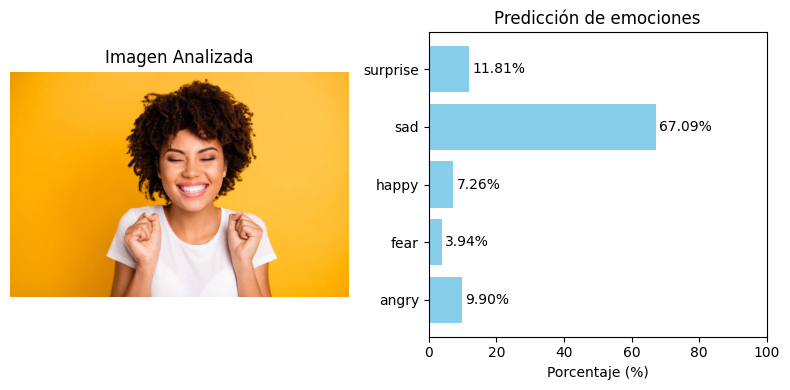

In [ ]:


# Elegir imagen
Tk().withdraw()
file_path = filedialog.askopenfilename()
IMG_SIZE = (96, 96)
# Leer y procesar imagen
img = image.load_img(file_path, target_size=IMG_SIZE)
img_array = image.img_to_array(img)
img_array = preprocess_input(img_array)
img_array = np.expand_dims(img_array, axis=0)

# Predecir
predicciones = model.predict(img_array)[0]

# Mostrar resultados
print("🔍 Predicción de emociones:")
for i, prob in enumerate(predicciones):
    print(f"{clases[i]}: {prob*100:.2f}%")

# Gráfica
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(image.load_img(file_path))
plt.axis('off')
plt.title("Imagen Analizada")

plt.subplot(1, 2, 2)
plt.barh(clases, predicciones * 100, color='skyblue')
plt.xlabel('Porcentaje (%)')
plt.title("Predicción de emociones")
plt.xlim(0, 100)
for i, v in enumerate(predicciones * 100):
    plt.text(v + 1, i, f"{v:.2f}%", va='center')

plt.tight_layout()
plt.show()


In [ ]:
# Rutas de origen
dataset1 = 'dataset1'
dataset2 = 'dataset2'
fusionado = 'fusionado'  # carpeta nueva

# Mapeo de nombres inconsistentes a finales
mapeo = {
    'anger': 'angry',
    'Angry': 'angry',
    'fear': 'fear',
    'Fear': 'fear',
    'happy': 'happy',
    'Happy': 'happy',
    'sad': 'sad',
    'Sad': 'sad',
    'surprise': 'surprise',
    'Suprise': 'surprise',
    'Neutral': 'neutral',
}

# Crear carpetas destino
final_labels = ['angry', 'fear', 'happy', 'neutral', 'sad', 'surprise']
for label in final_labels:
    os.makedirs(os.path.join(fusionado, label), exist_ok=True)

# Función para copiar imágenes
def copiar_imagenes(origen):
    for folder in os.listdir(origen):
        if folder in mapeo:
            destino = mapeo[folder]
            source_path = os.path.join(origen, folder)
            target_path = os.path.join(fusionado, destino)
            for file in os.listdir(source_path):
                if file.endswith(('.jpg', '.png', '.jpeg')):
                    shutil.copy(os.path.join(source_path, file), target_path)

# Ejecutar para ambos datasets
copiar_imagenes(dataset1)
copiar_imagenes(dataset2)

print("✅ Fusión completada en la carpeta 'fusionado'")


✅ Fusión completada en la carpeta 'fusionado'


In [ ]:

# Ruta al dataset fusionado
data_dir = 'fusionado'  # <- CAMBIA esto por tu ruta real
IMG_SIZE = (96, 96)

# Generadores de datos con augmentación y validación
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,
    horizontal_flip=True,
    rotation_range=15,
    zoom_range=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Cargar base MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
base_model.trainable = False  # Congela capas base

# Añadir capas personalizadas
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Crear modelo final
model = Model(inputs=base_model.input, outputs=predictions)

# Compilar
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


Found 6256 images belonging to 6 classes.
Found 1561 images belonging to 6 classes.


C:\Users\jeanp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 107s 515ms/step - accuracy: 0.2428 - loss: 1.9946 - val_accuracy: 0.3722 - val_loss: 1.6090
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 50s 255ms/step - accuracy: 0.3581 - loss: 1.6276 - val_accuracy: 0.3972 - val_loss: 1.5307
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 49s 251ms/step - accuracy: 0.3790 - loss: 1.5612 - val_accuracy: 0.3965 - val_loss: 1.5134
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 49s 248ms/step - accuracy: 0.4082 - loss: 1.5214 - val_accuracy: 0.4081 - val_loss: 1.5004
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 48s 243ms/step - accuracy: 0.4107 - loss: 1.4846 - val_accuracy: 0.4266 - val_loss: 1.4528
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 48s 247ms/step - accuracy: 0.4253 - loss: 1.4578 - val_accuracy: 0.4190 - val_loss: 1.4625
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 48s 245ms/step - accuracy: 0.4259 - loss: 1.4575 - val_accuracy: 0.4407 - val_loss: 1.4335
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 49s 249ms/step - accuracy: 0.4376 - loss: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
angry: 8.35%
fear: 6.54%
happy: 2.83%
neutral: 4.95%
sad: 4.76%
surprise: 72.58%


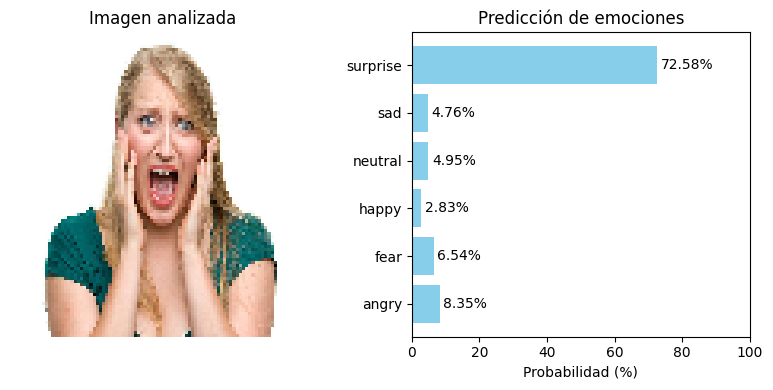

In [ ]:
# ⛔ Evita abrir ventana principal de Tkinter
Tk().withdraw()

# ✅ Seleccionar imagen
file_path = filedialog.askopenfilename(title="Selecciona una imagen")

# ✅ Cargar imagen y preprocesar
IMG_SIZE = (96, 96)
img = image.load_img(file_path, target_size=IMG_SIZE)
img_array = image.img_to_array(img)
img_array = preprocess_input(img_array)
img_array = np.expand_dims(img_array, axis=0)

# ✅ Predecir
predicciones = model.predict(img_array)[0]

# ✅ Obtener nombres de clases
clases = train_generator.class_indices
clases = dict((v, k) for k, v in clases.items())

# ✅ Mostrar predicciones
for i, prob in enumerate(predicciones):
    print(f"{clases[i]}: {prob*100:.2f}%")

# ✅ Visualización
plt.figure(figsize=(8, 4))

# Imagen
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')
plt.title("Imagen analizada")

# Barras
plt.subplot(1, 2, 2)
plt.barh(list(clases.values()), predicciones * 100, color='skyblue')
plt.xlabel('Probabilidad (%)')
plt.title("Predicción de emociones")
plt.xlim(0, 100)

# Etiquetas
for i, v in enumerate(predicciones * 100):
    plt.text(v + 1, i, f"{v:.2f}%", va='center')

plt.tight_layout()
plt.show()


In [ ]:
model.save("model.h5")